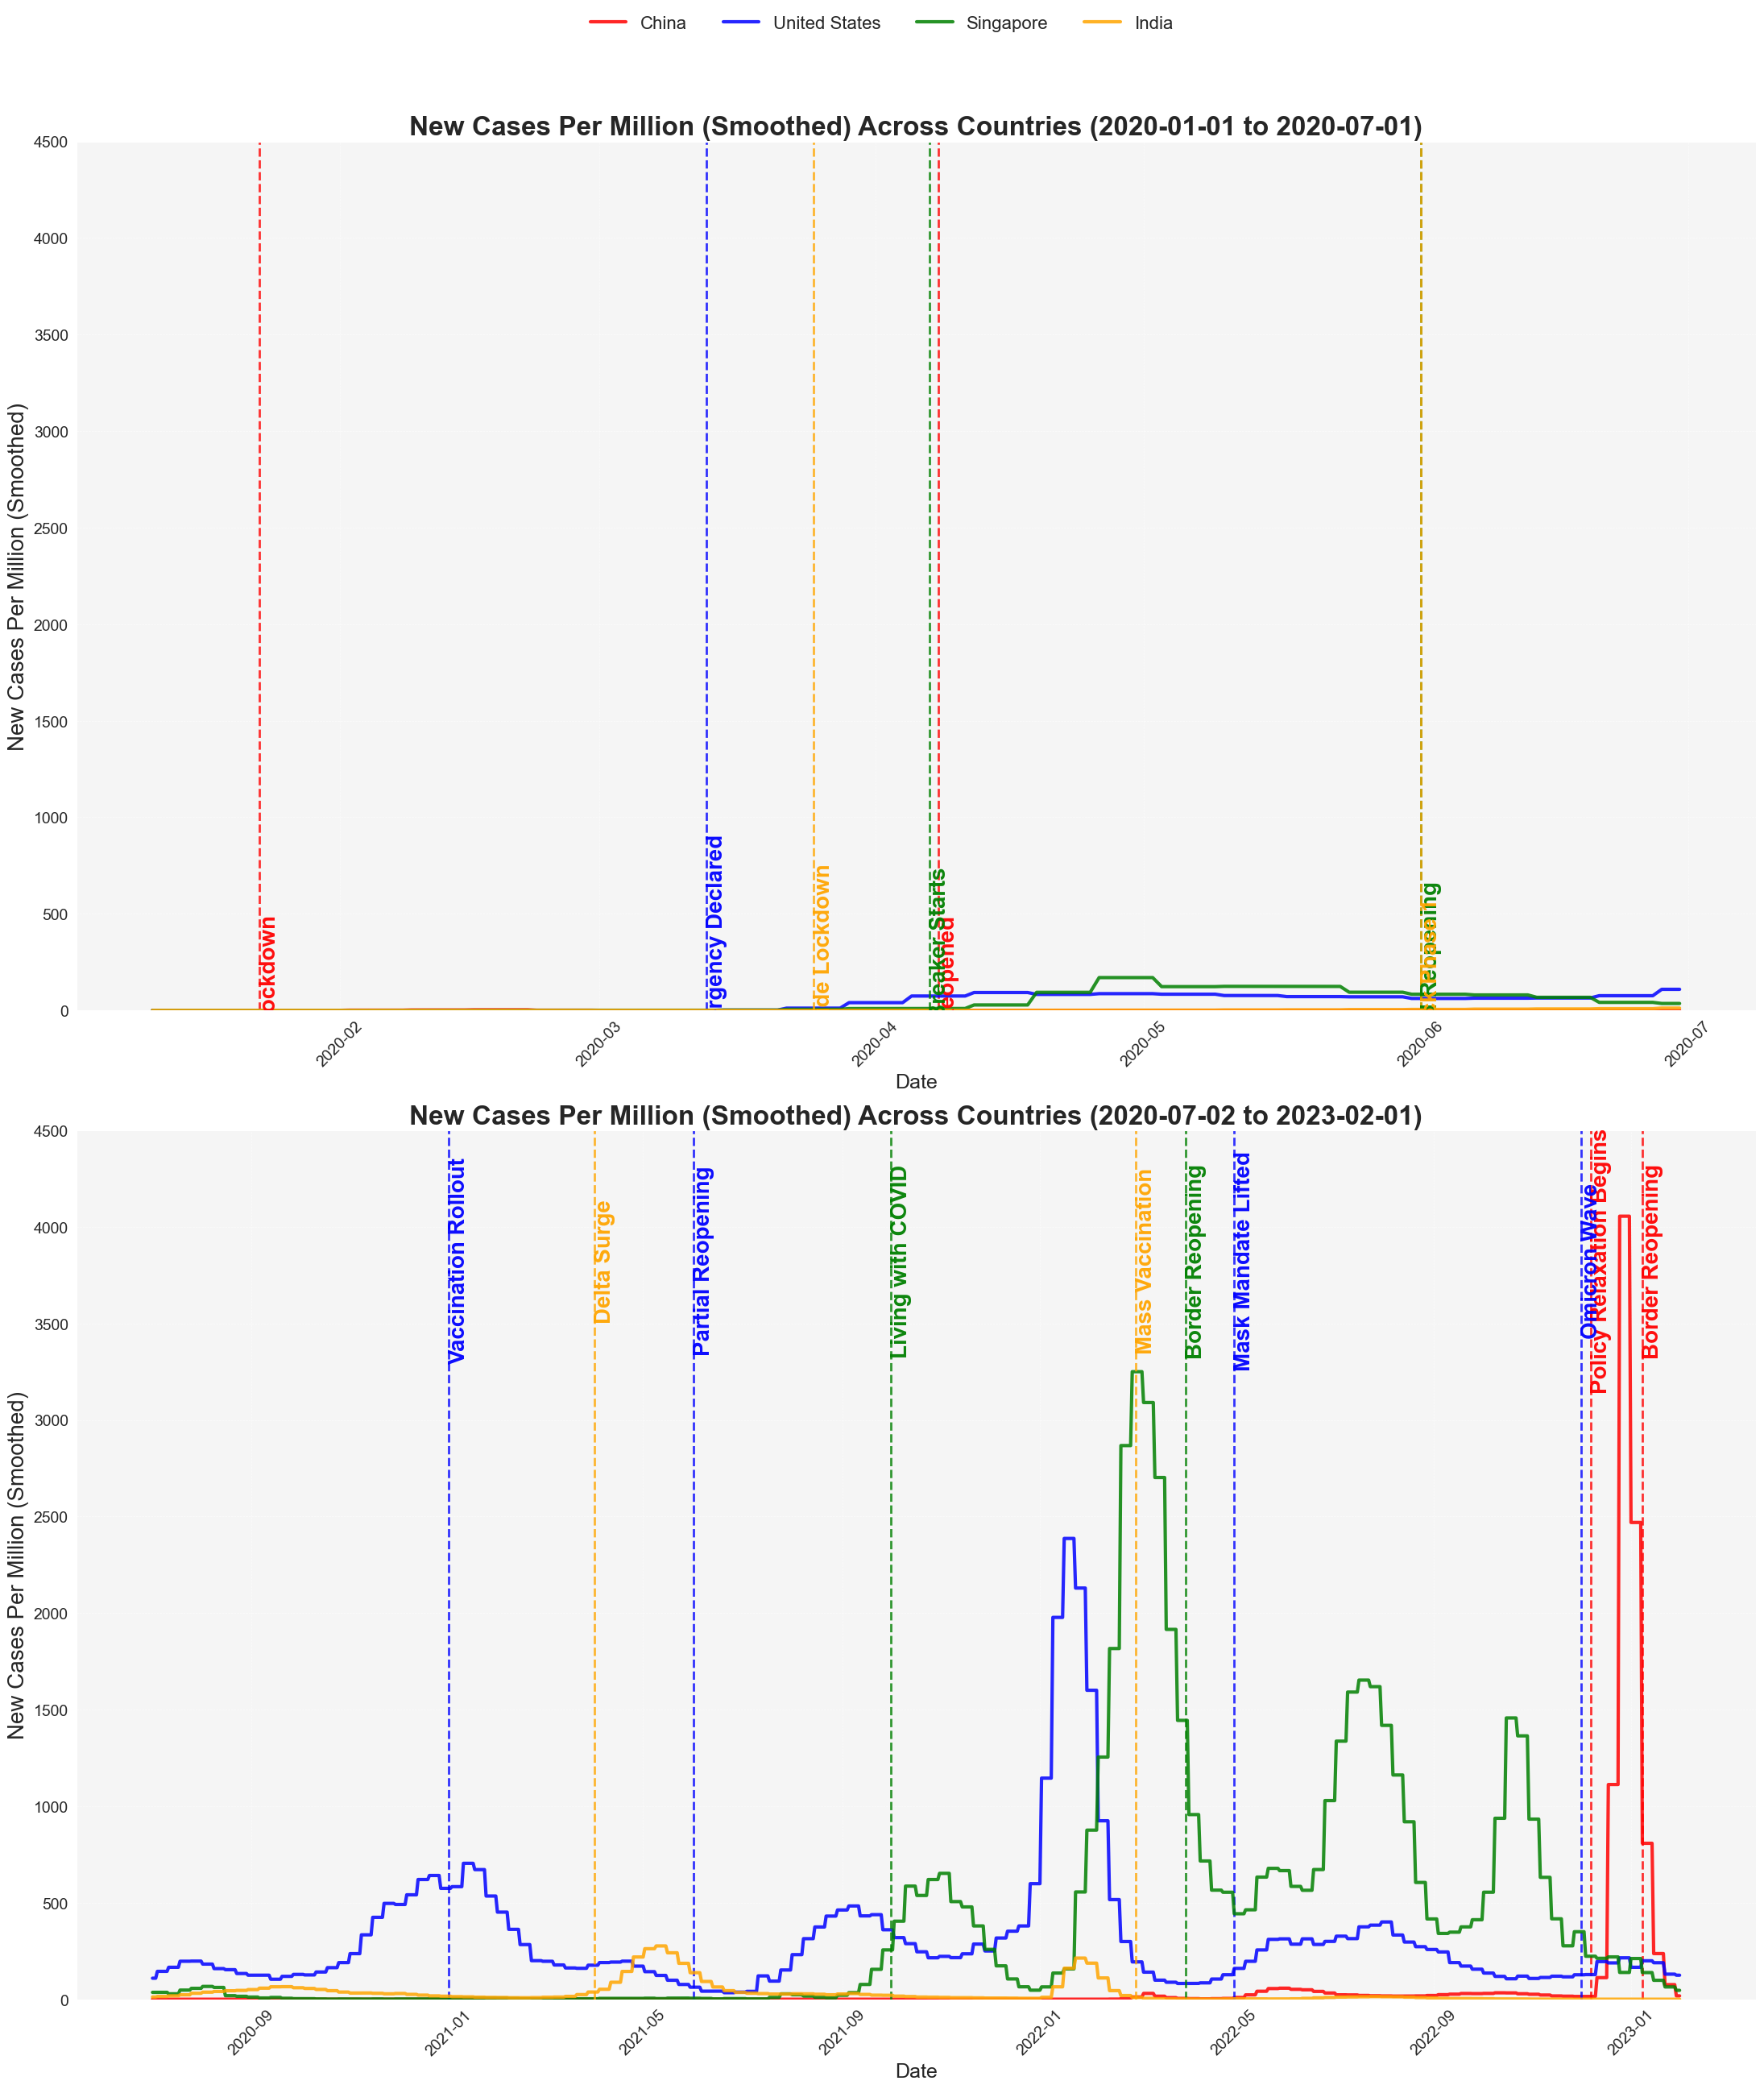

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 data
covid_data = pd.read_csv("owid-covid-data.csv")

# Filter for China, US, Singapore, India
countries = ["China", "United States", "Singapore", "India"]
df = covid_data[covid_data['location'].isin(countries)]

# Focus on relevant columns
df = df[["date", "location", "new_cases", "new_deaths", "stringency_index", "total_cases", 
         "total_deaths", "people_vaccinated_per_hundred", "gdp_per_capita", 
         "hospital_beds_per_thousand", "life_expectancy", "total_cases_per_million", "total_deaths_per_million"]]

df['date'] = pd.to_datetime(df['date'])

# Standardize cases per million population
df["new_cases_per_million"] = df["new_cases"] / (df["population"] / 1_000_000)

# Apply smoothing
df['new_cases_per_million_smoothed'] = df.groupby('location')['new_cases_per_million'].transform(lambda x: x.rolling(7).mean())

# Truncate the dataset to include only data up to February 2023
df = df[df["date"] < "2023-02-01"]

# Define custom colors for countries
color_map = {
    "China": "red",
    "United States": "blue",
    "Singapore": "green",
    "India": "orange"
}

# Define policy milestones for annotations
policy_milestones_detailed = {
    "China": [
        ("Wuhan Lockdown", "2020-01-23"),
        ("Wuhan Reopened", "2020-04-08"),
        ("Policy Relaxation Begins", "2022-12-07"),
        ("Border Reopening", "2023-01-08")
    ],
    "United States": [
        ("National Emergency Declared", "2020-03-13"),
        ("Vaccination Rollout", "2021-01-01"),
        ("Partial Reopening", "2021-06-01"),
        ("Mask Mandate Lifted", "2022-05-01"),
        ("Omicron Wave", "2022-12-01")
    ],
    "India": [
        ("Nationwide Lockdown", "2020-03-25"),
        ("Unlock Phase 1", "2020-06-01"),
        ("Delta Surge", "2021-04-01"),
        ("Mass Vaccination", "2022-03-01")
    ],
    "Singapore": [
        ("Circuit Breaker Starts", "2020-04-07"),
        ("Phased Reopening", "2020-06-01"),
        ("Living with COVID", "2021-10-01"),
        ("Border Reopening", "2022-04-01")
    ]
}

# Replot the data with enhancements for better aesthetics
fig, axes = plt.subplots(2, 1, figsize=(22, 26), sharey=True)

# Define time splits
time_ranges = [("2020-01-01", "2020-07-01"), ("2020-07-02", "2023-02-01")]



for i, (start_date, end_date) in enumerate(time_ranges):
    ax = axes[i]
    for country in countries:
        subset = df[(df["location"] == country) & (df["date"] >= start_date) & (df["date"] < end_date)]
        ax.plot(
            subset["date"],
            subset["new_cases_per_million_smoothed"],
            color=color_map[country],
            linewidth=3,
            alpha=0.85,
            label=country
        )

        # Add detailed policy milestones as vertical lines and annotations
        if country in policy_milestones_detailed:
            for event, date in policy_milestones_detailed[country]:
                if pd.to_datetime(start_date) <= pd.to_datetime(date) < pd.to_datetime(end_date):
                    ax.axvline(pd.to_datetime(date), color=color_map[country], linestyle="--", alpha=0.8, linewidth=2)
                    ax.text(
                        pd.to_datetime(date), ax.get_ylim()[1] * 0.85, event,
                        rotation=90, verticalalignment='center', fontsize=20,
                        color=color_map[country], alpha=0.95, clip_on=True, weight="bold"
                    )

    # Adjust y-axis intervals for the first time range
    if i == 0:
        ax.set_ylim(0, 500)  # Adjusted to focus on smaller values
        ax.yaxis.set_major_locator(plt.MultipleLocator(50))  # Smaller intervals for better detail
    else:
        ax.set_ylim(0, 4500)  # Keep the second plot unchanged
        ax.yaxis.set_major_locator(plt.MultipleLocator(500))  # Larger intervals to fit larger values

    # Enhance grid and aesthetics
    ax.set_facecolor("#f5f5f5")
    ax.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.set_title(f"New Cases Per Million (Smoothed) Across Countries ({start_date} to {end_date})", 
                 fontsize=24, weight='bold')
    ax.set_xlabel("Date", fontsize=18)
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)

# Shared Y-axis and legends
axes[0].set_ylabel("New Cases Per Million (Smoothed)", fontsize=20)
axes[1].set_ylabel("New Cases Per Million (Smoothed)", fontsize=20)

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", fontsize=16, ncol=4, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



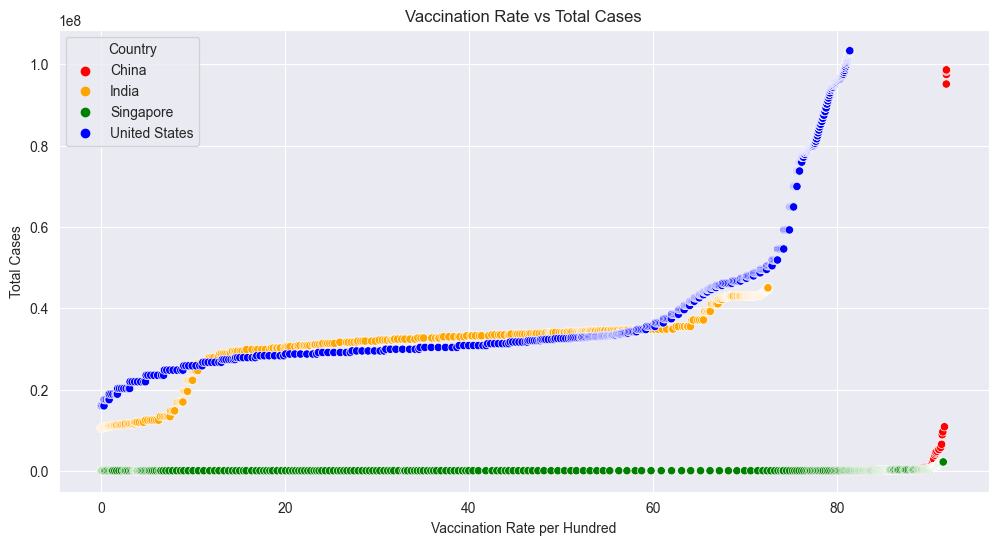

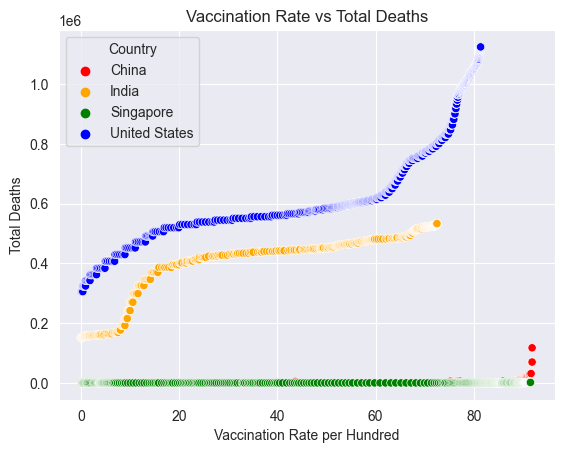

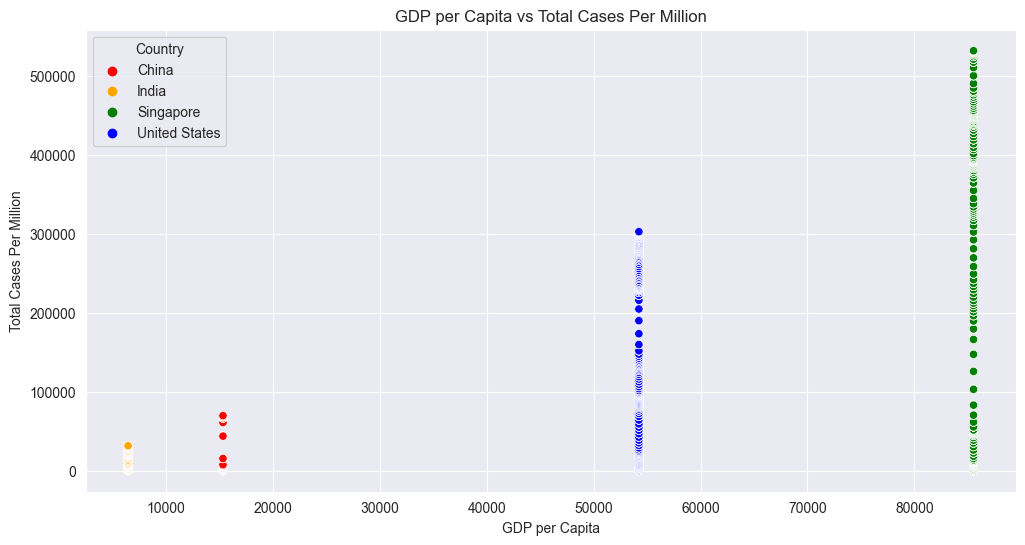

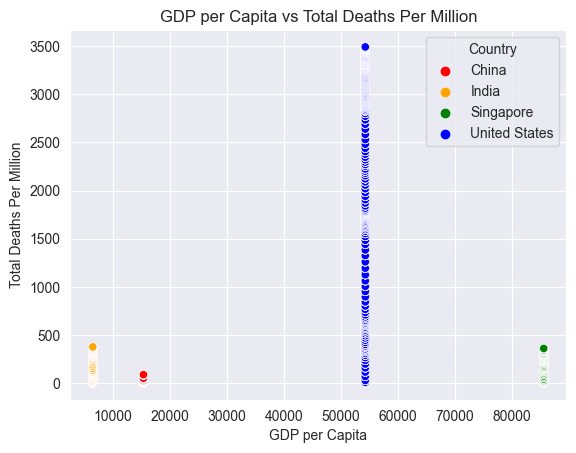

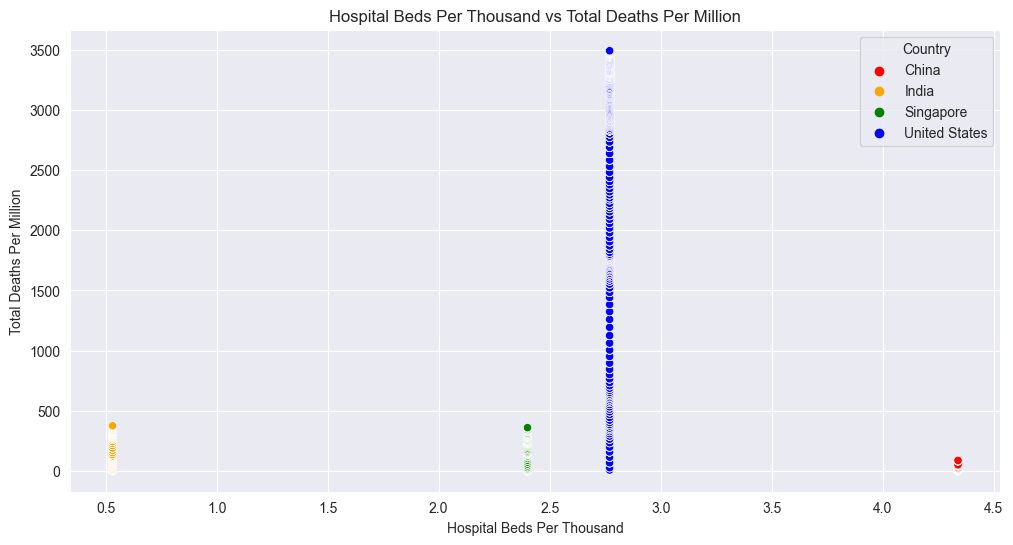

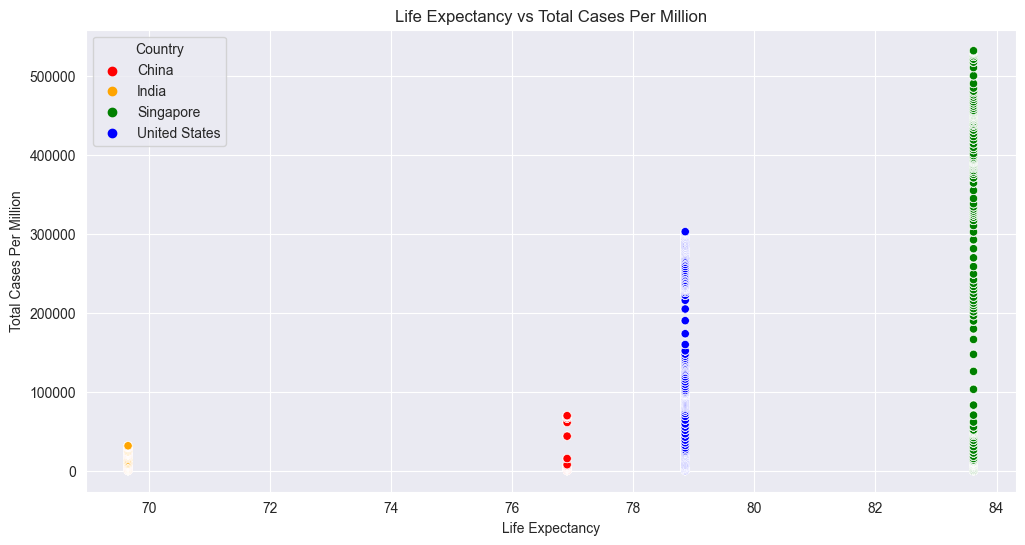

In [36]:
# Load COVID-19 data
covid_data = pd.read_csv("owid-covid-data.csv")

# Filter for China, US, Singapore, India
countries = ["China", "United States", "Singapore", "India"]
df = covid_data[covid_data['location'].isin(countries)]

# Focus on relevant columns
df = df[["date", "location", "new_cases", "new_deaths", "stringency_index", "total_cases", 
         "total_deaths", "people_vaccinated_per_hundred", "gdp_per_capita", 
         "hospital_beds_per_thousand", "life_expectancy", "total_cases_per_million", "total_deaths_per_million"]]

df['date'] = pd.to_datetime(df['date'])

# 2. Scatter Plot for Vaccination vs Total Cases/Deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="people_vaccinated_per_hundred", y="total_cases", hue="location", palette=color_map)
plt.title("Vaccination Rate vs Total Cases")
plt.xlabel("Vaccination Rate per Hundred")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.show()

sns.scatterplot(data=df, x="people_vaccinated_per_hundred", y="total_deaths", hue="location", palette=color_map)
plt.title("Vaccination Rate vs Total Deaths")
plt.xlabel("Vaccination Rate per Hundred")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.show()

# 3. Scatter Plot for GDP per Capita vs Cases/Deaths Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="gdp_per_capita", y="total_cases_per_million", hue="location", palette=color_map)
plt.title("GDP per Capita vs Total Cases Per Million")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Cases Per Million")
plt.legend(title="Country")
plt.show()

sns.scatterplot(data=df, x="gdp_per_capita", y="total_deaths_per_million", hue="location", palette=color_map)
plt.title("GDP per Capita vs Total Deaths Per Million")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Deaths Per Million")
plt.legend(title="Country")
plt.show()

# 4. Scatter Plot for Hospital Beds vs Deaths Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="hospital_beds_per_thousand", y="total_deaths_per_million", hue="location", palette=color_map)
plt.title("Hospital Beds Per Thousand vs Total Deaths Per Million")
plt.xlabel("Hospital Beds Per Thousand")
plt.ylabel("Total Deaths Per Million")
plt.legend(title="Country")
plt.show()

# 5. Scatter Plot for Life Expectancy vs Cases Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="life_expectancy", y="total_cases_per_million", hue="location", palette=color_map)
plt.title("Life Expectancy vs Total Cases Per Million")
plt.xlabel("Life Expectancy")
plt.ylabel("Total Cases Per Million")
plt.legend(title="Country")
plt.show()